# Recitation Feb.11

### 1. Numerically stable implementation of the sigmoid function
### 2. Numerically stable implementation of the log of the sigmoid function
### 3. Evaluations of binary classification.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sklearn.linear_model
import sklearn.metrics
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
cancer_data_dir = '../hw3/data_cancer/'

## 1. Numerically stable implementation of the sigmoid function

Resources:

* "Numerically stable sigmoid function" description from Tim Viera's blog (scroll down to the right section)
* https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

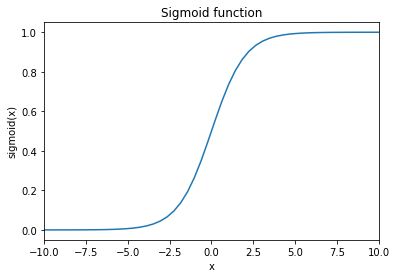

In [6]:
xs = np.linspace(-10,10,50)
ys = [sigmoid(x) for x in xs]
plt.plot(xs, ys)
plt.xlim(-10,10)
plt.title("Sigmoid function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.show()

### Try this on your computer with python3

In [7]:
print(sigmoid(-709))

1.216780750623423e-308


In [8]:
print(sigmoid(-710))

0.0


## What's happening? Underflow!

In [9]:
np.exp(710)

inf

In [10]:
1.0 / np.inf

0.0

## Big idea for numerical stability

We have two equivalent expressions. Use one for large inputs, another for large negative inputs

$$
\sigma(z) = \frac{1}{1 + e^{-z}} = \frac{ e^{z} }{1 + e^{z}}
$$

## This one handles negative inputs well:

In [11]:
def sigmoid1(z):
    return np.exp(z) / (np.exp(z) + 1.0)

In [12]:
sigmoid1(-730)

9.226315e-318

In [13]:
sigmoid1(-720)

2.0322308024e-313

## Numerically stable sigmoid function

In [14]:
def sigmoid_stable(x):
    if x > 0:
        return None # TODO fill by student
    else:
        return None # TODO fill by student

In [15]:
print(sigmoid_stable(-710))

None


## 2. Numerically stable implementation of the log of the sigmoid function

In [16]:
print(np.log(np.exp(1) + np.exp(2)))
print(np.log(np.exp(3) + np.exp(10)))
print(np.log(np.exp(710)))
print(np.log(np.exp(710) + np.exp(720)))
print(np.log(np.exp(1500) + np.exp(50)))

2.3132616875182226
10.000911466453774
inf
inf
inf


#### Math derivation on the board

In [17]:
def logSumExp(xs):
    if len(xs) == 1:
        return xs
    else:
        maximum = np.max(xs)
        summation = 0.0
        for x in xs:
            summation += np.exp(x - maximum)
        return maximum + np.log(summation)

In [18]:
print(logSumExp([1, 2]))
print(logSumExp([3, 10]))
print(logSumExp([0, 710]))
print(logSumExp([710, 720]))
print(logSumExp([1500, 50]))

2.313261687518223
10.000911466453774
710.0
720.0000453988993
1500.0


Recall logistic regression:

p_hat(x, w, b) = p(y = 1 | x) = sigmoid (w^T x + b)

To train a logistic regressor, we need to:
1. Define a loss function
2. Optimize/minimize the loss.

1. Loss Function: log_loss(y,p_hat) = -y * log (p_hat) - (1 - y) * log (1 - p_hat).
Math derivation on the board

# Big idea : can we write the loss function of logistic regression as a log-sum-exp?

See slides we discussed in class:
http://www.cs.tufts.edu/comp/135/2019s/slides/08_logistic_regression_2.pdf#page=17

Do you see a log-sum-exp there?

In [19]:
def log_loss_stable(zs):
    return # TODO, filled by student

### 3. Evaluations of binary classification

In [20]:
x_tr_M3 = np.loadtxt(cancer_data_dir + 'x_train.csv', delimiter=',', skiprows=1)
x_va_N3 = np.loadtxt(cancer_data_dir + 'x_valid.csv', delimiter=',', skiprows=1)
x_te_P3 = np.loadtxt(cancer_data_dir + 'x_test.csv', delimiter=',', skiprows=1)
y_tr_M = np.loadtxt(cancer_data_dir + 'y_train.csv', delimiter=',', skiprows=1)
y_va_N = np.loadtxt(cancer_data_dir + 'y_valid.csv', delimiter=',', skiprows=1)
y_te_P = np.loadtxt(cancer_data_dir + 'y_test.csv', delimiter=',', skiprows=1)
# 2 feature version of x arrays
x_tr_M2 = x_tr_M3[:, [0,2]].copy()
x_va_N2 = x_va_N3[:, [0,2]].copy()
x_te_P2 = x_te_P3[:, [0,2]].copy()

In [21]:
C_grid = np.logspace(-9, 6, 31)

tr_err_list = list()
va_err_list = list()
tr_loss_list = list()
va_loss_list = list()
lr = sklearn.linear_model.LogisticRegression(C=1000)
lr.fit(x_tr_M2, y_tr_M)

yproba1_tr_M = lr.predict_proba(x_tr_M2)[:,1]
yproba1_va_N = lr.predict_proba(x_va_N2)[:,1]
yproba1_te_N = lr.predict_proba(x_te_P2)[:,1]


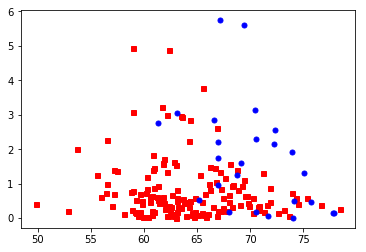

In [22]:
plt.plot(x_te_P2[y_te_P==0,0], x_te_P2[y_te_P==0,1], color='r', marker='s', linestyle='', markersize=5)
plt.plot(x_te_P2[y_te_P==1,0], x_te_P2[y_te_P==1,1], color='b', marker='.', linestyle='', markersize=10)

In [23]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    '''
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : int
        Number of true positives
    TN : int
        Number of true negatives
    FP : int
        Number of false positives
    FN : int
        Number of false negatives
    '''
    TP  = np.sum(yhat_N[ytrue_N==1])
    TN = np.sum(1-yhat_N[ytrue_N==0])
    FP = np.sum(yhat_N[ytrue_N==0])
    FN = np.sum(1-yhat_N[ytrue_N==1])
    return TP, TN, FP, FN

def calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute performance metrics for a given probabilistic classifier and threshold
    '''
    tp, tn, fp, fn = calc_TP_TN_FP_FN(ytrue_N, yproba1_N >= thresh)
    ## Compute ACC, TPR, TNR, etc.
    acc = (tp + tn) / float(tp + tn + fp + fn + 1e-10)
    tpr = tp / float(tp + fn + 1e-10)
    tnr = tn / float(fp + tn + 1e-10)
    ppv = tp / float(tp + fp + 1e-10)
    npv = tn / float(tn + fn + 1e-10)
    
    return acc, tpr, tnr, ppv, npv

def print_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Pretty print perf. metrics for a given probabilistic classifier and threshold
    '''
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
    
    ## Pretty print the results
    print("%.3f ACC" % acc)
    print("%.3f TPR" % tpr)
    print("%.3f TNR" % tnr)
    print("%.3f PPV" % ppv)
    print("%.3f NPV" % npv)
    
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

def compute_perf_metrics_across_thresholds(ytrue_N, yproba1_N, thresh_grid=None):
    ''' Compute common binary classifier performance metrics across many thresholds
    
    If no array of thresholds is provided, will use all 'unique' values
    in the yproba1_N array to define all possible thresholds with different performance.
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset

    Returns
    -------
    thresh_grid : 1D array of floats
        One entry for each possible threshold
    perf_dict : dict, with key, value pairs:
        * 'acc' : 1D array of accuracy values (one per threshold)
        * 'ppv' : 1D array of positive predictive values (one per threshold)
        * 'npv' : 1D array of negative predictive values (one per threshold)
        * 'tpr' : 1D array of true positive rates (one per threshold)
        * 'tnr' : 1D array of true negative rates (one per threshold)
    '''
    if thresh_grid is None:
        bin_edges = np.linspace(0, 1.001, 21)
        thresh_grid = np.sort(np.hstack([bin_edges, np.unique(yproba1_N)]))
    tpr_grid = np.zeros_like(thresh_grid)
    tnr_grid = np.zeros_like(thresh_grid)
    ppv_grid = np.zeros_like(thresh_grid)
    npv_grid = np.zeros_like(thresh_grid)
    acc_grid = np.zeros_like(thresh_grid)
    for tt, thresh in enumerate(thresh_grid):
        # Apply specific threshold to convert probas into hard binary values (0 or 1)
        # Then count number of true positives, true negatives, etc.
        # Then compute metrics like accuracy and true positive rate
        acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
        acc_grid[tt] = acc
        tpr_grid[tt] = tpr
        tnr_grid[tt] = tnr
        ppv_grid[tt] = ppv
        npv_grid[tt] = npv
    return thresh_grid, dict(
        acc=acc_grid,
        tpr=tpr_grid,
        tnr=tnr_grid,
        ppv=ppv_grid,
        npv=npv_grid)

def make_plot_perf_vs_threshold(ytrue_N, yproba1_N, bin_edges=np.linspace(0, 1, 21)):
    ''' Make pretty plot of binary classifier performance as threshold increases
    
    Produces a plot with 3 rows:
    * top row: hist of predicted probabilities for negative examples (shaded red)
    * middle row: hist of predicted probabilities for positive examples (shaded blue)
    * bottom row: line plots of metrics that require hard decisions (ACC, TPR, TNR, etc.)
    '''
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
    sns.distplot(
        yproba1_N[ytrue_N == 0],
        color='r', bins=bin_edges, kde=False, rug=True, ax=axes[0]);
    sns.distplot(
        yproba1_N[ytrue_N == 1],
        color='b', bins=bin_edges, kde=False, rug=True, ax=axes[1]);

    thresh_grid, perf_grid = compute_perf_metrics_across_thresholds(ytrue_N, yproba1_N)
    axes[2].plot(thresh_grid, perf_grid['acc'], 'k-', label='accuracy')
    axes[2].plot(thresh_grid, perf_grid['tpr'], 'b-', label='TPR (recall/sensitivity)')
    axes[2].plot(thresh_grid, perf_grid['tnr'], 'g-', label='TNR (specificity)')
    axes[2].plot(thresh_grid, perf_grid['ppv'], 'c-', label='PPV (precision)')
    axes[2].plot(thresh_grid, perf_grid['npv'], 'm-', label='NPV')
    
    axes[2].legend()
    axes[2].set_ylim([0, 1])

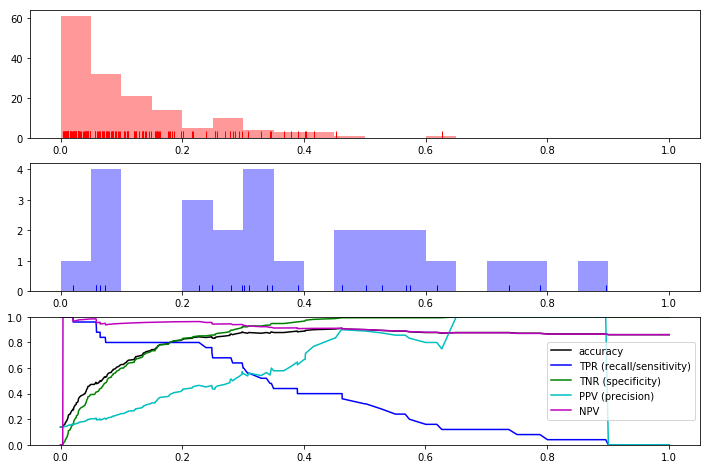

In [24]:
make_plot_perf_vs_threshold(y_va_N, yproba1_va_N)